<a href="https://colab.research.google.com/github/pawel-kowal/machine-learning/blob/main/supervised/07_model_selection/03_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [2]:
raw_data = make_moons(n_samples = 2000, noise=0.25, random_state = 42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1','x2','target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


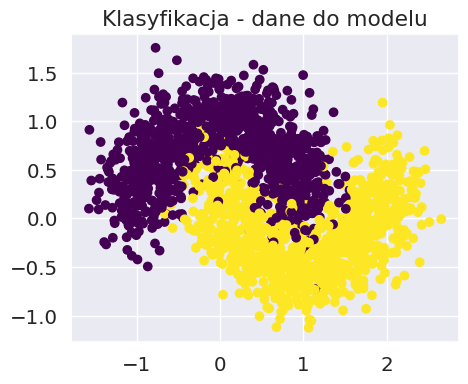

In [4]:
plt.figure(figsize=(5,4))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'{X_train.shape}')
print(f'{X_test.shape}')
print(f'{y_train.shape}')
print(f'{y_test.shape}')

(1500, 2)
(500, 2)
(1500,)
(500,)


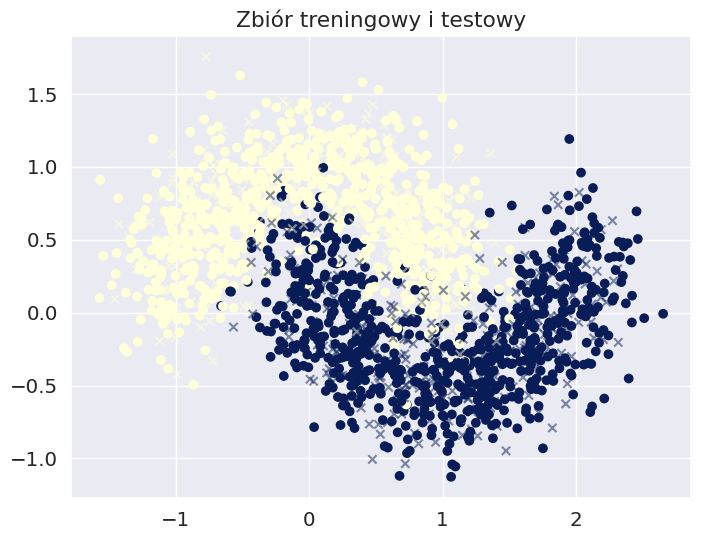

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='YlGnBu', label='training_set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='YlGnBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.show()

###Wybór optymalnych hiperparametrów - Grid Search

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1,10),
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(classifier, param_grid= params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [8]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6}

In [9]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


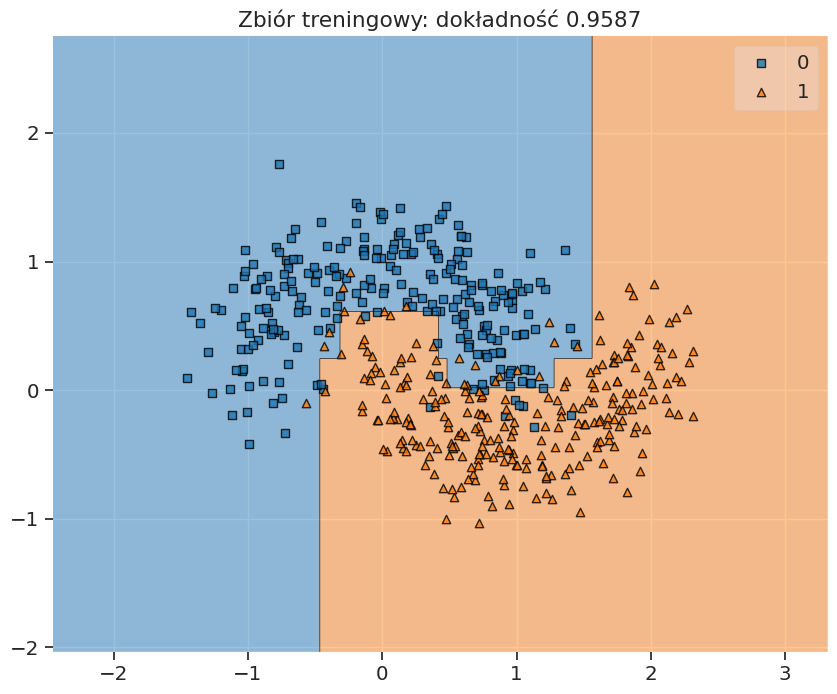

In [11]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

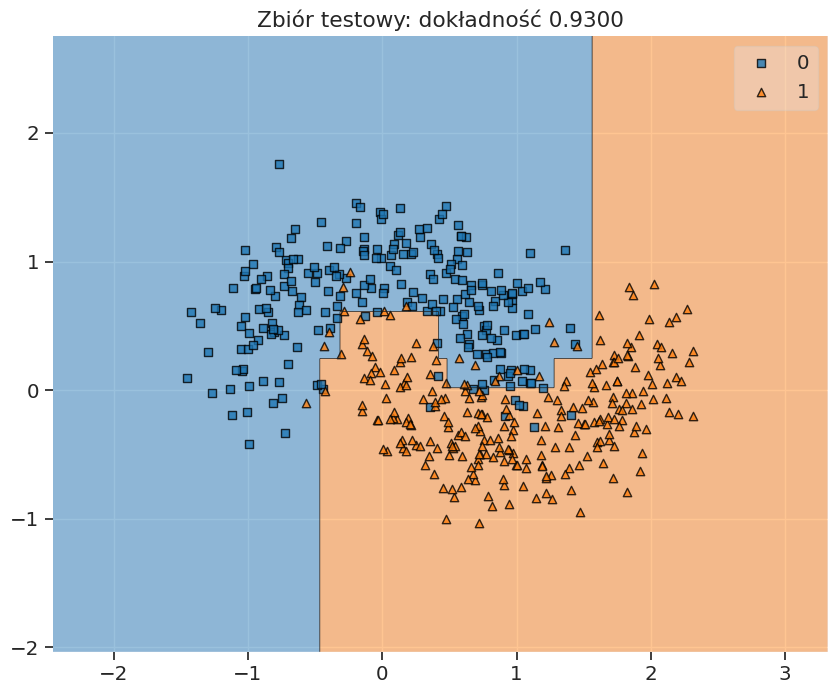

In [12]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=42)

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': np.arange(1, 10), 
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [14]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}

In [15]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)

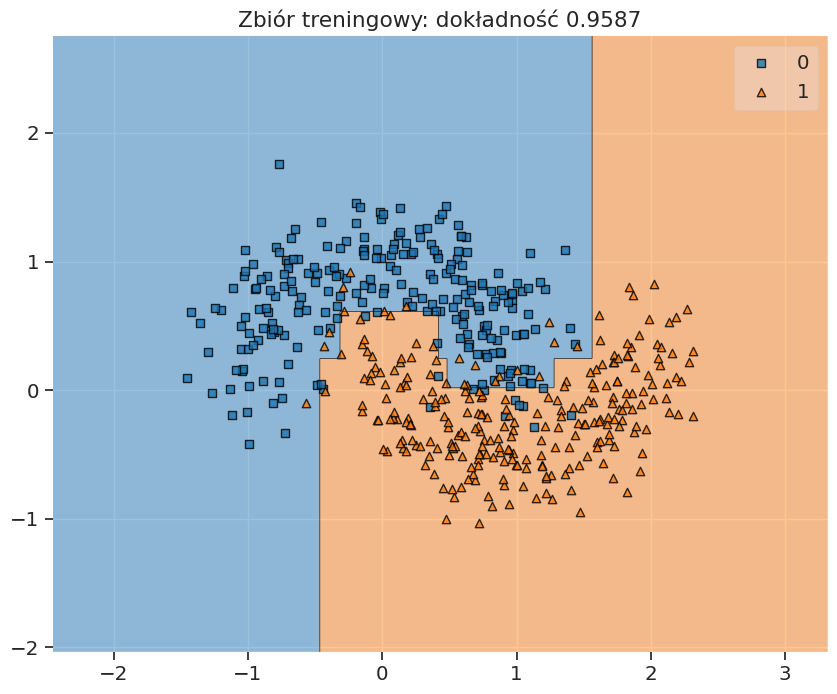

In [16]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

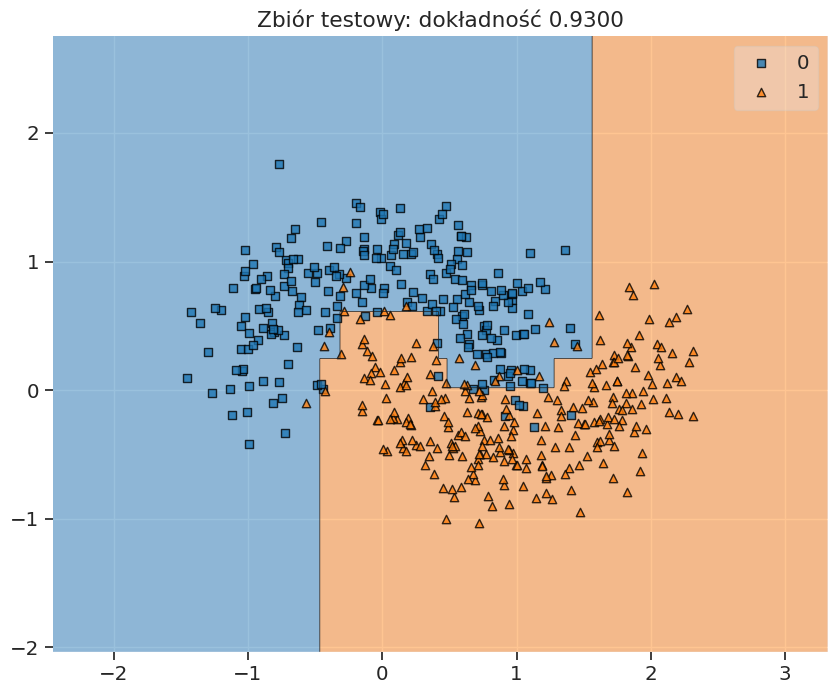

In [17]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()

In [18]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = [
    {'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
    {'criterion': ['entropy'], 'min_samples_leaf': [2, 3, 4, 5]}              
]

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_leaf': [2, 3, 4, 5]}],
             scoring='accuracy')

In [19]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [20]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 10),
    'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50]},
             scoring='accuracy')

In [22]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'n_estimators': 50}

Text(0.5, 1.0, 'Zbiór treningowy: dokładność 0.9613')

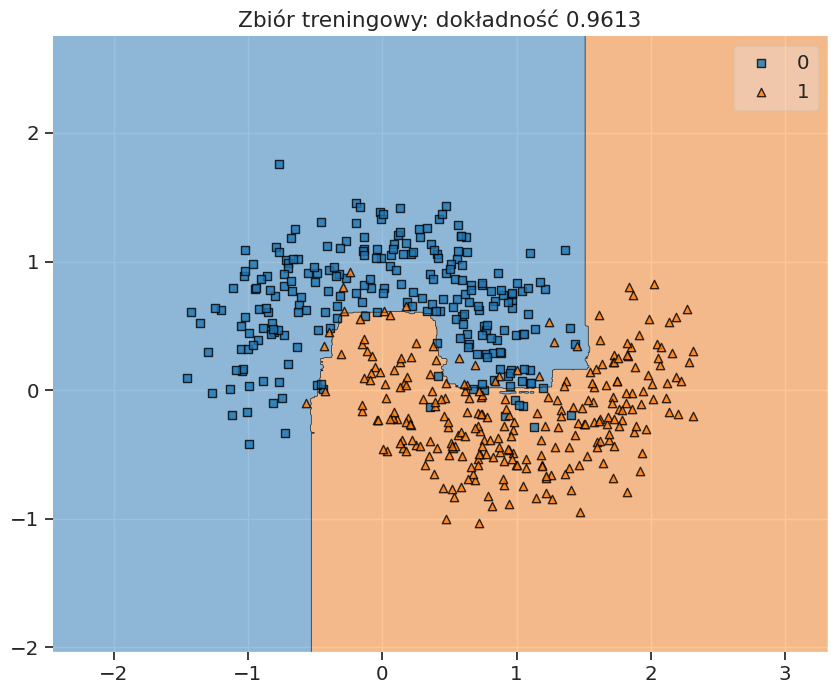

In [23]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')

Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.9320')

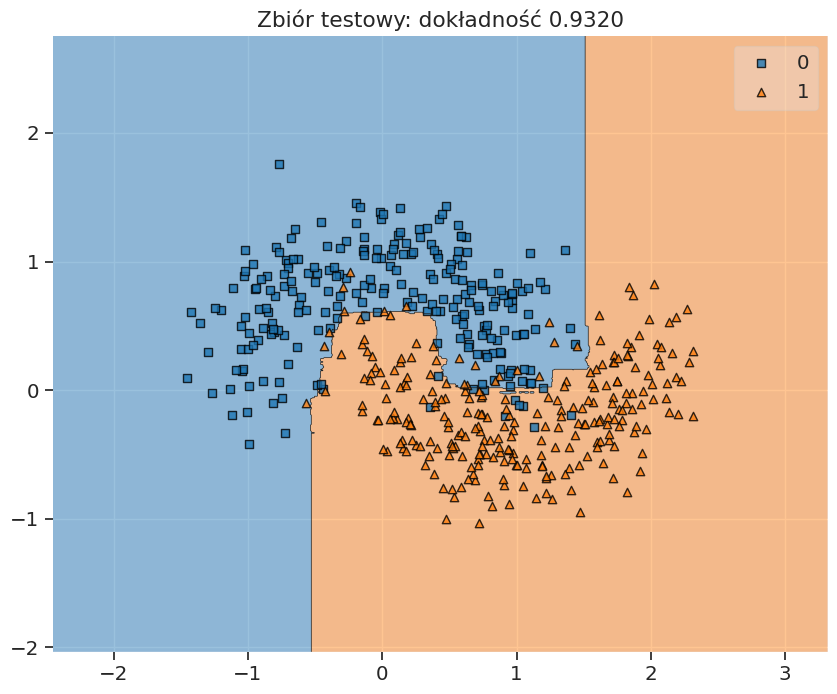

In [24]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')